<a href="https://colab.research.google.com/github/asstronut/OleTwitterSentimentAnalysis/blob/master/TwitterSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title

## Install and Import Libraries

In [1]:
!pip install textblob --upgrade --quiet

In [142]:
# import libraries
from textblob import TextBlob
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [3]:
tweepy.__version__

'3.10.0'

## Authentication

In [ ]:
# authentication
api_key = input('Input your Twitter API Key: ')
api_key_secret = input('Input your Twitter API Secret Key: ')

access_token = input('Input your Access Token: ')
access_token_key = input('Input your Access Token Secret: ')

auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_key)
api = tweepy.API(auth)

## Getting Tweets with Keywords or Hashtag

Mendapatkan Tweet dari Twitter dengan keyword 'ole' sebanyak 500 Tweet

In [32]:
q = "ole"
num_tweets = 500

tweets = tweepy.Cursor(api.search, q=q, lang='en').items(num_tweets)

Membuat dataframe dengan data berisi Tweet yang sudah diambil

In [33]:
df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

In [34]:
df

,Tweets
0,RT @adedeji_dilly: @dynamic2050 @wilex_william...
1,@Msimelelo @HarryMaguire93 @ManUtd https://t.c...
2,My view on Ole hasn't changed. The guy got bac...
3,@Adam_WBAFC Poor in game management which we’v...
4,@Robbie_United @MadJrnyMan @ManUtdNSW @ManUtd ...
...,...
495,RT @TrollFootball: Ole: You have won a lot of ...
496,RT @suhailshaheen1: 1/3\nSher M. Abbas Stanikz...
497,@MHANDISI_IAN @ecoSokoni @AderahJ @OkiogaTerry...
498,RT @TrollFootball: Ole: You have won a lot of ...


## Cleaning Data

In [110]:
def cleaner(tweet):
  tweet = re.sub(r'RT ', '', tweet) # remove RT
  tweet = re.sub(r'@[A-Za-z0-9_:]+|@[_A-Za-z0-9:]+', '', tweet) # remove mentions
  tweet = re.sub(r'#', '', tweet) # remove hashtags
  tweet = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', tweet) # remove urls
  tweet = re.sub(r'\n', '', tweet)
  return tweet.strip()

In [96]:
df['Tweets'] = df['Tweets'].apply(cleaner)

In [112]:
df.head(10)

,Tweets
0,Ole is the best for you guys😅
1,OLE GUNNAR SOLKSJAER POST MATCH REACTION VS BS...
2,My view on Ole hasn't changed. The guy got bac...
3,Poor in game management which we’ve seen for t...
4,OLE GUNNAR SOLKSJAER POST MATCH REACTION VS…
5,Ole Gunnar Solskjaer's explanation of Cristian...
6,"I wish Ole would have started with Shaw, Magui..."
7,"Even if you give Ole this team, we would still..."
8,OLE GUNNAR SOLKSJAER POST MATCH REACTION VS BS...
9,Hello FAM 😍 New Original ESS goggles available...


In [115]:
df = df.drop(df[df['Tweets'] == ''].index)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweets  500 non-null    object
dtypes: object(1)
memory usage: 7.8+ KB


## Numbers

In [117]:
# get tweet's subjectivity score
def get_subjectivity(tweet):
  return TextBlob(tweet).sentiment.subjectivity

# get tweet's polarity score
def get_polarity(tweet):
  return TextBlob(tweet).sentiment.polarity

In [118]:
df['Polarity'] = df['Tweets'].apply(get_polarity)
df['Subjectivity'] = df['Tweets'].apply(get_subjectivity)

In [145]:
df

,Tweets,Polarity,Subjectivity,Sentiment
0,Ole is the best for you guys😅,1.000000,0.300000,Positive
1,OLE GUNNAR SOLKSJAER POST MATCH REACTION VS BS...,0.100000,0.400000,Positive
2,My view on Ole hasn't changed. The guy got bac...,-0.100000,0.100000,Negative
3,Poor in game management which we’ve seen for t...,-0.283333,0.466667,Negative
4,OLE GUNNAR SOLKSJAER POST MATCH REACTION VS…,0.000000,0.000000,Neutral
...,...,...,...,...
495,Ole: You have won a lot of trophies but you ha...,0.000000,0.000000,Neutral
496,"1/3Sher M. Abbas Stanikzai, Deputy Foreign Min...",-0.125000,0.125000,Negative
497,…,0.000000,0.000000,Neutral
498,Ole: You have won a lot of trophies but you ha...,0.000000,0.000000,Neutral


In [126]:
def get_sentiment(polarity):
  if polarity > 0:
    return 'Positive'
  elif polarity < 0:
    return 'Negative'
  return 'Neutral'

In [127]:
df['Sentiment'] = df['Polarity'].apply(get_sentiment)

In [144]:
df

,Tweets,Polarity,Subjectivity,Sentiment
0,Ole is the best for you guys😅,1.000000,0.300000,Positive
1,OLE GUNNAR SOLKSJAER POST MATCH REACTION VS BS...,0.100000,0.400000,Positive
2,My view on Ole hasn't changed. The guy got bac...,-0.100000,0.100000,Negative
3,Poor in game management which we’ve seen for t...,-0.283333,0.466667,Negative
4,OLE GUNNAR SOLKSJAER POST MATCH REACTION VS…,0.000000,0.000000,Neutral
...,...,...,...,...
495,Ole: You have won a lot of trophies but you ha...,0.000000,0.000000,Neutral
496,"1/3Sher M. Abbas Stanikzai, Deputy Foreign Min...",-0.125000,0.125000,Negative
497,…,0.000000,0.000000,Neutral
498,Ole: You have won a lot of trophies but you ha...,0.000000,0.000000,Neutral


In [129]:
df_positive = df[df['Sentiment'] == 'Positive']
df_negative = df[df['Sentiment'] == 'Negative']
df_neutral = df[df['Sentiment'] == 'Neutral']

In [135]:
pos_per = round(len(df_positive)/len(df), 1) * 100
neg_per = round(len(df_negative)/len(df), 1) * 100
neu_per = round(len(df_neutral)/len(df), 1) * 100

In [136]:
print(f'{len(df_positive)} ({pos_per}%) of positive tweets')
print(f'{len(df_negative)} ({neg_per}%) of negative tweets')
print(f'{len(df_neutral)} ({neu_per}%) of neutral tweets')

210 (40.0%) of positive tweets
101 (20.0%) of negative tweets
189 (40.0%) of neutral tweets


## Plotting

Text(0.5, 1.0, 'Hasil Analisis Sentimen pada Platform Twitter untuk Kata Kunci: ole')

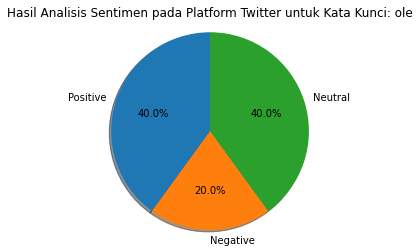

In [137]:
labels = ['Positive', 'Negative', 'Neutral']
sizes = [pos_per, neg_per, neu_per]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, startangle=90, shadow=True, autopct='%1.1f%%')
ax.axis('equal')
plt.title("Hasil Analisis Sentimen pada Platform Twitter untuk Kata Kunci: "+q)

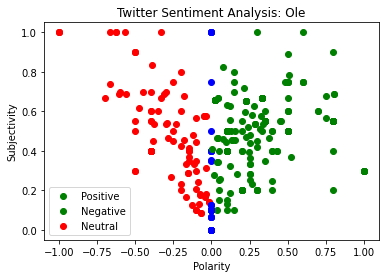

In [139]:
for index, row in df.iterrows():
  if row['Sentiment'] == 'Positive':
    plt.scatter(row['Polarity'], row['Subjectivity'], color='green')
  elif row['Sentiment'] == 'Negative':
    plt.scatter(row['Polarity'], row['Subjectivity'], color='red')
  elif row['Sentiment'] == 'Neutral':
    plt.scatter(row['Polarity'], row['Subjectivity'], color='blue')

plt.title('Twitter Sentiment Analysis: Ole')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.legend(['Positive', 'Negative', 'Neutral'])
plt.show()

## Create WordCloud

In [140]:
#Function to Create Wordcloud
def create_wordcloud(text):
  mask = np.array(Image.open("M2jeo.jpg"))
  stopwords = set(STOPWORDS)
  wc = WordCloud(background_color="white",
  mask = mask,
  max_words=3000,
  stopwords=stopwords,
  repeat=True)
  wc.generate(str(text))
  wc.to_file("wc.png")
  print("Word Cloud Saved Successfully")
  path="wc.png"
  display(Image.open(path))

Word Cloud Saved Successfully


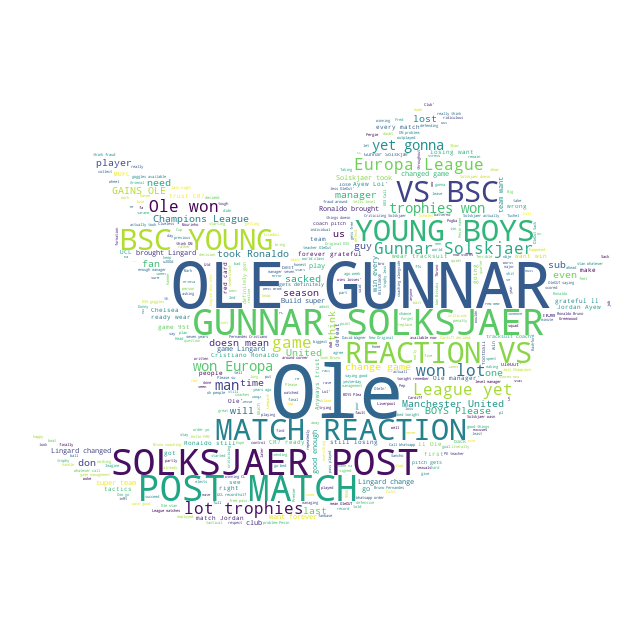

In [143]:
create_wordcloud(df['Tweets'].values)